In [38]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

inputs = np.random.rand(4)
params = np.random.rand(2, 3)

inputs

array([0.5042065 , 0.24437768, 0.50374289, 0.75320912])

In [97]:
params = np.random.rand(2, 3)

In [74]:
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(x, params):
    for i in range(4):
        qml.RX(x[i], wires=i)
    for i in range(4):
        qml.RZ(i // 2 * np.pi / 2, wires=i)
    for i in range(2):
        qml.QFT(wires=range(i, 4, 2))

    for i in range(2):
        for j in range(i, 4, 2):
            qml.Rot(params[i][0], params[i][1], params[i][2], wires=j)
    for i in range(2):
        qml.QFT(wires=range(i, 4, 2)).inv()
    return qml.probs(wires=range(2)) #qml.expval(qml.PauliZ(1))


In [75]:
print(qml.draw(circuit)(inputs, params))

0: ──RX(0.50)──RZ(0.00)─╭QFT──Rot(0.33,0.78,0.39)──────────────────────╭QFT⁻¹────────┤ ╭Probs
1: ──RX(0.24)──RZ(0.00)─│────╭QFT──────────────────Rot(0.01,0.60,0.74)─│──────╭QFT⁻¹─┤ ╰Probs
2: ──RX(0.50)──RZ(1.57)─╰QFT─│─────────────────────Rot(0.33,0.78,0.39)─╰QFT⁻¹─│──────┤       
3: ──RX(0.75)──RZ(1.57)──────╰QFT──────────────────Rot(0.01,0.60,0.74)────────╰QFT⁻¹─┤       


/Users/david/miniconda3/envs/QNet/lib/python3.8/site-packages/pennylane/operation.py:1506: UserWarning: In-place inversion with inverse is deprecated. Please use qml.adjoint or qml.pow instead.
  warnings.warn(


In [76]:
u = qml.matrix(circuit)(inputs, params)
np.abs(u.real)

array([[5.71691848e-04, 1.23032814e-01, 3.87231408e-02, 3.21608858e-02,
        3.58816949e-01, 5.80360292e-02, 8.97232246e-02, 2.51301522e-02,
        3.63934894e-01, 1.31479256e-01, 7.41176735e-02, 4.66194418e-02,
        3.45264830e-01, 1.55420032e-01, 1.43703493e-01, 3.05686864e-03],
       [5.84642327e-02, 5.05821498e-01, 5.73136040e-03, 8.61495382e-02,
        1.72459355e-01, 4.64355488e-05, 3.07891385e-02, 1.76762542e-02,
        2.70933226e-02, 1.08479315e-01, 4.03111542e-02, 2.79254419e-01,
        5.02701482e-02, 1.65703140e-01, 9.25185362e-02, 3.35638298e-02],
       [4.98699853e-02, 5.89214658e-02, 5.81950021e-01, 3.50052078e-02,
        1.66588021e-01, 4.06412078e-02, 4.11149573e-02, 1.65654546e-01,
        1.48102738e-01, 3.16620756e-03, 1.17395917e-02, 7.76737145e-02,
        6.28103683e-03, 3.94424770e-02, 2.27722075e-01, 3.37242963e-02],
       [1.56783753e-02, 1.82810724e-01, 1.26394600e-01, 5.46016896e-01,
        6.41564049e-02, 2.28081041e-02, 1.64951465e-01, 2.645

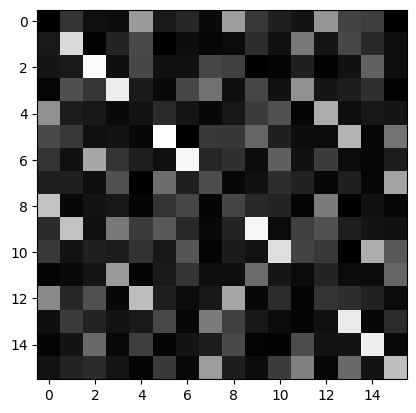

In [77]:
plt.imshow(np.abs(u.real), cmap='gray')

In [98]:
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(x, params):
    for i in range(4):
        qml.RX(x[i], wires=i)
    for i in range(4):
        qml.RZ(i // 2 * np.pi / 2, wires=i)

    for i in range(2):
        for j in range(i * 2, (i+1)*2):
            qml.Rot(params[i][0], params[i][1], params[i][2], wires=j)
    for i in range(2):
        qml.GroverOperator(wires=range(i * 2, (i+1)*2))

    for i in range(2):
        for j in range(i * 2, (i+1)*2):
            qml.Rot(params[i][0], params[i][1], params[i][2], wires=j)
    for i in range(2):
        qml.GroverOperator(wires=range(i * 2, (i+1)*2))

    return qml.probs(wires=range(2)) #qml.expval(qml.PauliZ(1))

u = qml.matrix(circuit)(inputs, params)
print(qml.draw(circuit)(inputs, params))


0: ──RX(0.50)──RZ(0.00)──Rot(0.63,0.33,0.03)─╭GroverOperator──Rot(0.63,0.33,0.03)─╭GroverOperator─┤
1: ──RX(0.24)──RZ(0.00)──Rot(0.63,0.33,0.03)─╰GroverOperator──Rot(0.63,0.33,0.03)─╰GroverOperator─┤
2: ──RX(0.50)──RZ(1.57)──Rot(0.65,0.79,0.04)─╭GroverOperator──Rot(0.65,0.79,0.04)─╭GroverOperator─┤
3: ──RX(0.75)──RZ(1.57)──Rot(0.65,0.79,0.04)─╰GroverOperator──Rot(0.65,0.79,0.04)─╰GroverOperator─┤

  ╭Probs
  ╰Probs
        
        


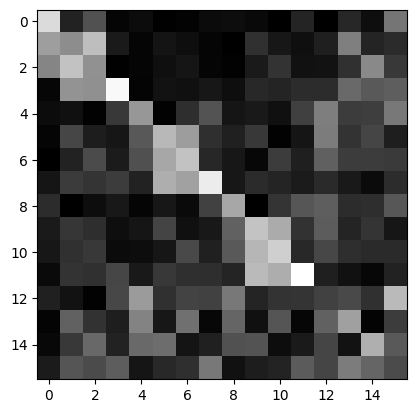

In [99]:
plt.imshow(np.abs(u.real), cmap='gray')